In [114]:
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
# Load the data
flights_df = pd.read_csv(r"C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\cleaned_combined_data_v1.csv")

In [116]:
tswift_df = pd.read_csv(r"C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\extra_fun_data\Taylor_Swift_Eras_Tour.csv")


In [117]:
tswift_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Tour Dates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Countdown!,Date,City,Stadium,Opener 1,Opener 2,Notes,NaN,NaN,NaN,NaN
3,NaN,NaN,"Fri, Mar 17, 2023","Glendale, AZ",STATE FARM STADIUM,Paramore,GAYLE,Opening Night,NaN,NaN,NaN,NaN
4,NaN,NaN,"Sat, Mar 18, 2023",NaN,NaN,Paramore,GAYLE,NaN,NaN,NaN,NaN,NaN


In [118]:
nan_columns = tswift_df.columns[tswift_df.isna().all()].tolist()
print(nan_columns)

['Unnamed: 0', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10']


In [119]:
# Drop columns that are 100% NaN
tswift_df = tswift_df.dropna(axis=1, how='all')

# Drop rows that are 100% NaN
tswift_df = tswift_df.dropna(axis=0, how='all')


In [120]:
non_nan_rows = tswift_df[tswift_df['Unnamed: 1'].notna()]
print(non_nan_rows)


     Unnamed: 1         Unnamed: 2                            Unnamed: 3  \
1    Tour Dates                NaN                                   NaN   
2    Countdown!               Date                                  City   
125       #NUM!  Wed, Jul 24, 2024                                   NaN   
126           0  Sat, Jul 27, 2024                       Munich, Germany   
127           1  Sun, Jul 28, 2024                                   NaN   
128           5   Thu, Aug 1, 2024                        Warsaw, Poland   
129           6   Fri, Aug 2, 2024                                   NaN   
130           7   Sat, Aug 3, 2024                                   NaN   
131          12   Thu, Aug 8, 2024                       Vienna, Austria   
132          13   Fri, Aug 9, 2024                                   NaN   
133          14  Sat, Aug 10, 2024                                   NaN   
134          19  Thu, Aug 15, 2024                London, United Kingdom   
135         

In [121]:
tswift_df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 11
1,Tour Dates,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Countdown!,Date,City,Stadium,Opener 1,Opener 2,Notes,NaN
3,NaN,"Fri, Mar 17, 2023","Glendale, AZ",STATE FARM STADIUM,Paramore,GAYLE,Opening Night,NaN
4,NaN,"Sat, Mar 18, 2023",NaN,NaN,Paramore,GAYLE,NaN,NaN
5,NaN,"Fri, Mar 24, 2023","Las Vegas, NV",ALLEGIANT STADIUM,beabadoobee,GAYLE,NaN,NaN


In [122]:

# Drop the first two rows using iloc
tswift_df = tswift_df.iloc[2:].reset_index(drop=True)

# Display the updated DataFrame
print(tswift_df.head())


  Unnamed: 1         Unnamed: 2     Unnamed: 3          Unnamed: 4  \
0        NaN  Fri, Mar 17, 2023   Glendale, AZ  STATE FARM STADIUM   
1        NaN  Sat, Mar 18, 2023            NaN                 NaN   
2        NaN  Fri, Mar 24, 2023  Las Vegas, NV   ALLEGIANT STADIUM   
3        NaN  Sat, Mar 25, 2023            NaN                 NaN   
4        NaN  Fri, Mar 31, 2023  Arlington, TX        AT&T STADIUM   

    Unnamed: 5 Unnamed: 6     Unnamed: 7 Unnamed: 11  
0     Paramore      GAYLE  Opening Night         NaN  
1     Paramore      GAYLE            NaN         NaN  
2  beabadoobee      GAYLE            NaN         NaN  
3  beabadoobee      GAYLE            NaN         NaN  
4         MUNA      GAYLE            NaN         NaN  


In [123]:
tswift_df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 11
0,NaN,"Fri, Mar 17, 2023","Glendale, AZ",STATE FARM STADIUM,Paramore,GAYLE,Opening Night,NaN
1,NaN,"Sat, Mar 18, 2023",NaN,NaN,Paramore,GAYLE,NaN,NaN
2,NaN,"Fri, Mar 24, 2023","Las Vegas, NV",ALLEGIANT STADIUM,beabadoobee,GAYLE,NaN,NaN
3,NaN,"Sat, Mar 25, 2023",NaN,NaN,beabadoobee,GAYLE,NaN,NaN
4,NaN,"Fri, Mar 31, 2023","Arlington, TX",AT&T STADIUM,MUNA,GAYLE,NaN,NaN


In [124]:
# Define the new column names
new_column_names = ['tour_date', 'tour_city', 'tour_stadium', 'tour_opener', 'notes']

# Replace the column names for the specified columns
tswift_df.columns = new_column_names + list(tswift_df.columns[len(new_column_names):])

# Display the updated DataFrame
print(tswift_df.head())


  tour_date          tour_city   tour_stadium         tour_opener  \
0       NaN  Fri, Mar 17, 2023   Glendale, AZ  STATE FARM STADIUM   
1       NaN  Sat, Mar 18, 2023            NaN                 NaN   
2       NaN  Fri, Mar 24, 2023  Las Vegas, NV   ALLEGIANT STADIUM   
3       NaN  Sat, Mar 25, 2023            NaN                 NaN   
4       NaN  Fri, Mar 31, 2023  Arlington, TX        AT&T STADIUM   

         notes Unnamed: 6     Unnamed: 7 Unnamed: 11  
0     Paramore      GAYLE  Opening Night         NaN  
1     Paramore      GAYLE            NaN         NaN  
2  beabadoobee      GAYLE            NaN         NaN  
3  beabadoobee      GAYLE            NaN         NaN  
4         MUNA      GAYLE            NaN         NaN  


In [125]:
# Drop rows where 'Tour Dates' column has NaN values
tswift_df = tswift_df.dropna(subset=['tour_date'])

# Reset the index after dropping rows
tswift_df.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
print(tswift_df.head())


  tour_date          tour_city     tour_stadium     tour_opener     notes  \
0     #NUM!  Wed, Jul 24, 2024              NaN             NaN  Paramore   
1         0  Sat, Jul 27, 2024  Munich, Germany  Olympiastadion  Paramore   
2         1  Sun, Jul 28, 2024              NaN             NaN  Paramore   
3         5   Thu, Aug 1, 2024   Warsaw, Poland    PGE Narodowy  Paramore   
4         6   Fri, Aug 2, 2024              NaN             NaN  Paramore   

  Unnamed: 6 Unnamed: 7 Unnamed: 11  
0        NaN        NaN         NaN  
1        NaN        NaN         NaN  
2        NaN        NaN         NaN  
3        NaN        NaN         NaN  
4        NaN        NaN         NaN  


In [126]:
# Drop the 'Tour Dates' column
tswift_df = tswift_df.drop(columns=['tour_date'])

# Display the updated DataFrame
print(tswift_df.head())

           tour_city     tour_stadium     tour_opener     notes Unnamed: 6  \
0  Wed, Jul 24, 2024              NaN             NaN  Paramore        NaN   
1  Sat, Jul 27, 2024  Munich, Germany  Olympiastadion  Paramore        NaN   
2  Sun, Jul 28, 2024              NaN             NaN  Paramore        NaN   
3   Thu, Aug 1, 2024   Warsaw, Poland    PGE Narodowy  Paramore        NaN   
4   Fri, Aug 2, 2024              NaN             NaN  Paramore        NaN   

  Unnamed: 7 Unnamed: 11  
0        NaN         NaN  
1        NaN         NaN  
2        NaN         NaN  
3        NaN         NaN  
4        NaN         NaN  


In [127]:
# Define the new column names
new_column_names = ['tour_date', 'tour_city', 'tour_stadium', 'tour_opener', 'notes']

# Replace the column names for the specified columns
tswift_df.columns = new_column_names + list(tswift_df.columns[len(new_column_names):])

# Display the updated DataFrame
print(tswift_df.head())


           tour_date        tour_city    tour_stadium tour_opener notes  \
0  Wed, Jul 24, 2024              NaN             NaN    Paramore   NaN   
1  Sat, Jul 27, 2024  Munich, Germany  Olympiastadion    Paramore   NaN   
2  Sun, Jul 28, 2024              NaN             NaN    Paramore   NaN   
3   Thu, Aug 1, 2024   Warsaw, Poland    PGE Narodowy    Paramore   NaN   
4   Fri, Aug 2, 2024              NaN             NaN    Paramore   NaN   

  Unnamed: 7 Unnamed: 11  
0        NaN         NaN  
1        NaN         NaN  
2        NaN         NaN  
3        NaN         NaN  
4        NaN         NaN  


In [128]:
# Drop the specified columns
tswift_df = tswift_df.drop(columns=['notes', 'Unnamed: 7', 'Unnamed: 11'])

# Display the updated DataFrame
print(tswift_df.head())


           tour_date        tour_city    tour_stadium tour_opener
0  Wed, Jul 24, 2024              NaN             NaN    Paramore
1  Sat, Jul 27, 2024  Munich, Germany  Olympiastadion    Paramore
2  Sun, Jul 28, 2024              NaN             NaN    Paramore
3   Thu, Aug 1, 2024   Warsaw, Poland    PGE Narodowy    Paramore
4   Fri, Aug 2, 2024              NaN             NaN    Paramore


In [129]:
# Ensure 'tour_date' is in datetime format for proper sorting
tswift_df['tour_date'] = pd.to_datetime(tswift_df['tour_date'])

# Sort the DataFrame by 'tour_date'
tswift_df = tswift_df.sort_values(by='tour_date').reset_index(drop=True)

# Fill NaN values in 'tour_city' with the nearest city name above it
tswift_df['tour_city'] = tswift_df['tour_city'].fillna(method='ffill')
tswift_df['tour_stadium'] = tswift_df['tour_stadium'].fillna(method='ffill')
# Display the updated DataFrame
print(tswift_df.head(-5))


    tour_date                 tour_city          tour_stadium    tour_opener
0  2024-07-24                       NaN                   NaN       Paramore
1  2024-07-27           Munich, Germany        Olympiastadion       Paramore
2  2024-07-28           Munich, Germany        Olympiastadion       Paramore
3  2024-08-01            Warsaw, Poland          PGE Narodowy       Paramore
4  2024-08-02            Warsaw, Poland          PGE Narodowy       Paramore
5  2024-08-03            Warsaw, Poland          PGE Narodowy       Paramore
6  2024-08-08           Vienna, Austria  Ernst-Happel-Stadion       Paramore
7  2024-08-09           Vienna, Austria  Ernst-Happel-Stadion       Paramore
8  2024-08-10           Vienna, Austria  Ernst-Happel-Stadion       Paramore
9  2024-08-15    London, United Kingdom       Wembley Stadium       Paramore
10 2024-08-16    London, United Kingdom       Wembley Stadium       Paramore
11 2024-08-17    London, United Kingdom       Wembley Stadium       Paramore

C:\Users\hopeh\AppData\Local\Temp\ipykernel_1764\4071595525.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tswift_df['tour_city'] = tswift_df['tour_city'].fillna(method='ffill')
C:\Users\hopeh\AppData\Local\Temp\ipykernel_1764\4071595525.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tswift_df['tour_stadium'] = tswift_df['tour_stadium'].fillna(method='ffill')


In [130]:
# Ensure 'tour_date' is in datetime format
tswift_df['tour_date'] = pd.to_datetime(tswift_df['tour_date'])

# Define the date range
start_date = '2023-05-01'
end_date = '2024-04-30'

# Filter the DataFrame for dates within the specified range
filtered_df = tswift_df[(tswift_df['tour_date'] >= start_date) & (tswift_df['tour_date'] <= end_date)]

# Reset the index for the filtered DataFrame
filtered_df.reset_index(drop=True, inplace=True)

# Display the filtered DataFrame
print(filtered_df)


Empty DataFrame
Columns: [tour_date, tour_city, tour_stadium, tour_opener]
Index: []


In [134]:
eras_tour = {
    "Date": [
        "March 17", "March 18", "March 24", "March 25", "March 31", 
        "April 1", "April 2", "April 13", "April 14", "April 15", 
        "April 21", "April 22", "April 23", "April 28", "April 29", 
        "April 30", "May 5", "May 6", "May 7", "May 12", 
        "May 13", "May 14", "May 19", "May 20", "May 21", 
        "May 26", "May 27", "May 28", "June 2", "June 3", 
        "June 4", "June 9", "June 10", "June 16", "June 17", 
        "June 23", "June 24", "June 30", "July 1", "July 7", 
        "July 8", "July 14", "July 15", "July 22", "July 23", 
        "July 28", "July 29", "August 3", "August 4", "August 5", 
        "August 7", "August 8", "August 9"

    ],
    "City": [
        "Glendale", "Glendale", "Paradise", "Paradise", "Arlington", 
        "Arlington", "Arlington", "Tampa", "Tampa", "Tampa", 
        "Houston", "Houston", "Houston", "Atlanta", "Atlanta", 
        "Atlanta", "Nashville", "Nashville", "Nashville", "Philadelphia", 
        "Philadelphia", "Philadelphia", "Foxborough", "Foxborough", 
        "Foxborough", "East Rutherford", "East Rutherford", 
        "East Rutherford", "Chicago", "Chicago", "Chicago", 
        "Detroit", "Detroit", "Pittsburgh", "Pittsburgh", "Minneapolis", 
        "Minneapolis", "Cincinnati", "Cincinnati", "Kansas City", 
        "Kansas City", "Denver", "Denver", "Seattle", "Seattle", 
        "Santa Clara", "Santa Clara", "Inglewood", "Inglewood", 
        "Inglewood", "Inglewood", "Inglewood", "Inglewood", 
    ],
}

In [136]:
# Check lengths of lists in eras_tour
print("Lengths of eras_tour columns:")
for key, value in eras_tour.items():
    print(f"{key}: {len(value)}")


Lengths of eras_tour columns:
Date: 53
City: 53


In [140]:

# Creating DataFrames
eras_tour = pd.DataFrame(eras_tour)


In [142]:
eras_tour.head(12)

,Date,City
0,March 17,Glendale
1,March 18,Glendale
2,March 24,Paradise
3,March 25,Paradise
4,March 31,Arlington
5,April 1,Arlington
6,April 2,Arlington
7,April 13,Tampa
8,April 14,Tampa
9,April 15,Tampa


In [144]:
# Mapping of cities to IATA codes for the nearest large airports
iata_mapping = {
    "Glendale": "PHX",          # Phoenix Sky Harbor International Airport
    "Paradise": "LAS",          # Harry Reid International Airport (Las Vegas)
    "Arlington": "DFW",         # Dallas/Fort Worth International Airport
    "Tampa": "TPA",             # Tampa International Airport
    "Houston": "IAH",           # George Bush Intercontinental Airport
    "Atlanta": "ATL",           # Hartsfield-Jackson Atlanta International Airport
    "Nashville": "BNA",         # Nashville International Airport
    "Philadelphia": "PHL",      # Philadelphia International Airport
    "Foxborough": "BOS",        # Logan International Airport (Boston)
    "East Rutherford": "EWR",   # Newark Liberty International Airport
    "Chicago": "ORD",           # O'Hare International Airport
    "Detroit": "DTW",           # Detroit Metropolitan Airport
    "Pittsburgh": "PIT",        # Pittsburgh International Airport
    "Minneapolis": "MSP",       # Minneapolis–Saint Paul International Airport
    "Cincinnati": "CVG",        # Cincinnati/Northern Kentucky International Airport
    "Kansas City": "MCI",       # Kansas City International Airport
    "Denver": "DEN",            # Denver International Airport
    "Seattle": "SEA",           # Seattle–Tacoma International Airport
    "Santa Clara": "SJC",       # San Jose International Airport
    "Inglewood": "LAX",         # Los Angeles International Airport
    "Mexico City": "MEX",       # Mexico City International Airport
    "Buenos Aires": "EZE",      # Ministro Pistarini International Airport
    "Rio de Janeiro": "GIG",    # Rio de Janeiro/Galeão International Airport
    "São Paulo": "GRU",         # São Paulo/Guarulhos–Governador André Franco Montoro International Airport
    "Tokyo": "NRT",             # Narita International Airport
    "Melbourne": "MEL",         # Melbourne Airport
    "Sydney": "SYD",            # Sydney Kingsford Smith Airport
    "Singapore": "SIN",         # Singapore Changi Airport
}

# Use this mapping to create a new column 


In [146]:
# Function to map city to IATA code
def get_iata_code(city):
    return iata_mapping.get(city, None)

# Create a new column for IATA codes
eras_tour['IATA'] = eras_tour['City'].apply(get_iata_code)

# Display the updated DataFrame
print(eras_tour)

        Date             City IATA
0   March 17         Glendale  PHX
1   March 18         Glendale  PHX
2   March 24         Paradise  LAS
3   March 25         Paradise  LAS
4   March 31        Arlington  DFW
5    April 1        Arlington  DFW
6    April 2        Arlington  DFW
7   April 13            Tampa  TPA
8   April 14            Tampa  TPA
9   April 15            Tampa  TPA
10  April 21          Houston  IAH
11  April 22          Houston  IAH
12  April 23          Houston  IAH
13  April 28          Atlanta  ATL
14  April 29          Atlanta  ATL
15  April 30          Atlanta  ATL
16     May 5        Nashville  BNA
17     May 6        Nashville  BNA
18     May 7        Nashville  BNA
19    May 12     Philadelphia  PHL
20    May 13     Philadelphia  PHL
21    May 14     Philadelphia  PHL
22    May 19       Foxborough  BOS
23    May 20       Foxborough  BOS
24    May 21       Foxborough  BOS
25    May 26  East Rutherford  EWR
26    May 27  East Rutherford  EWR
27    May 28  East R

In [148]:

# Convert the 'Date' column to datetime format using the year 2023
eras_tour['Date'] = pd.to_datetime(eras_tour['Date'] + ' 2023', format='%B %d %Y')

# Review the updated DataFrame
print(eras_tour)

         Date             City IATA
0  2023-03-17         Glendale  PHX
1  2023-03-18         Glendale  PHX
2  2023-03-24         Paradise  LAS
3  2023-03-25         Paradise  LAS
4  2023-03-31        Arlington  DFW
5  2023-04-01        Arlington  DFW
6  2023-04-02        Arlington  DFW
7  2023-04-13            Tampa  TPA
8  2023-04-14            Tampa  TPA
9  2023-04-15            Tampa  TPA
10 2023-04-21          Houston  IAH
11 2023-04-22          Houston  IAH
12 2023-04-23          Houston  IAH
13 2023-04-28          Atlanta  ATL
14 2023-04-29          Atlanta  ATL
15 2023-04-30          Atlanta  ATL
16 2023-05-05        Nashville  BNA
17 2023-05-06        Nashville  BNA
18 2023-05-07        Nashville  BNA
19 2023-05-12     Philadelphia  PHL
20 2023-05-13     Philadelphia  PHL
21 2023-05-14     Philadelphia  PHL
22 2023-05-19       Foxborough  BOS
23 2023-05-20       Foxborough  BOS
24 2023-05-21       Foxborough  BOS
25 2023-05-26  East Rutherford  EWR
26 2023-05-27  East Rutherfo

In [150]:
eras_tour['eras_tour'] = "Tour Date"

In [152]:
eras_tour

,Date,City,IATA,eras_tour
0,2023-03-17,Glendale,PHX,Tour Date
1,2023-03-18,Glendale,PHX,Tour Date
2,2023-03-24,Paradise,LAS,Tour Date
3,2023-03-25,Paradise,LAS,Tour Date
4,2023-03-31,Arlington,DFW,Tour Date
5,2023-04-01,Arlington,DFW,Tour Date
6,2023-04-02,Arlington,DFW,Tour Date
7,2023-04-13,Tampa,TPA,Tour Date
8,2023-04-14,Tampa,TPA,Tour Date
9,2023-04-15,Tampa,TPA,Tour Date


In [154]:
# Save the eras_tour DataFrame to a CSV file
eras_tour.to_csv(r'C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\eras_tour_data.csv', index=False)


In [156]:
import pandas as pd

# Load the data
eras_tour_df = pd.read_csv(r'C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\eras_tour_data.csv')
combined_data = pd.read_csv(r'C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\cleaned_combined_data_v1.csv')


In [157]:
# Ensure both date columns are in the same format (if necessary)
combined_data['date'] = pd.to_datetime(combined_data['date'])
eras_tour_df['Date'] = pd.to_datetime(eras_tour_df['Date'])

print(combined_data['date'].unique())
print(eras_tour_df['Date'].unique())
print(combined_data['origin_iata'].unique())
print(combined_data['dest_iata'].unique())
print(eras_tour_df['IATA'].unique())


<DatetimeArray>
['2023-05-01 00:00:00', '2023-05-02 00:00:00', '2023-05-03 00:00:00',
 '2023-05-04 00:00:00', '2023-05-05 00:00:00', '2023-05-06 00:00:00',
 '2023-05-07 00:00:00', '2023-05-08 00:00:00', '2023-05-09 00:00:00',
 '2023-05-10 00:00:00',
 ...
 '2024-04-21 00:00:00', '2024-04-22 00:00:00', '2024-04-23 00:00:00',
 '2024-04-24 00:00:00', '2024-04-25 00:00:00', '2024-04-26 00:00:00',
 '2024-04-27 00:00:00', '2024-04-28 00:00:00', '2024-04-29 00:00:00',
 '2024-04-30 00:00:00']
Length: 366, dtype: datetime64[ns]
<DatetimeArray>
['2023-03-17 00:00:00', '2023-03-18 00:00:00', '2023-03-24 00:00:00',
 '2023-03-25 00:00:00', '2023-03-31 00:00:00', '2023-04-01 00:00:00',
 '2023-04-02 00:00:00', '2023-04-13 00:00:00', '2023-04-14 00:00:00',
 '2023-04-15 00:00:00', '2023-04-21 00:00:00', '2023-04-22 00:00:00',
 '2023-04-23 00:00:00', '2023-04-28 00:00:00', '2023-04-29 00:00:00',
 '2023-04-30 00:00:00', '2023-05-05 00:00:00', '2023-05-06 00:00:00',
 '2023-05-07 00:00:00', '2023-05-12 00:0

In [158]:

# Standardize datasets, applying to strings only
eras_tour_df = eras_tour_df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

# Check the changes
print(eras_tour_df)


         Date             City IATA  eras_tour
0  2023-03-17         glendale  phx  tour date
1  2023-03-18         glendale  phx  tour date
2  2023-03-24         paradise  las  tour date
3  2023-03-25         paradise  las  tour date
4  2023-03-31        arlington  dfw  tour date
5  2023-04-01        arlington  dfw  tour date
6  2023-04-02        arlington  dfw  tour date
7  2023-04-13            tampa  tpa  tour date
8  2023-04-14            tampa  tpa  tour date
9  2023-04-15            tampa  tpa  tour date
10 2023-04-21          houston  iah  tour date
11 2023-04-22          houston  iah  tour date
12 2023-04-23          houston  iah  tour date
13 2023-04-28          atlanta  atl  tour date
14 2023-04-29          atlanta  atl  tour date
15 2023-04-30          atlanta  atl  tour date
16 2023-05-05        nashville  bna  tour date
17 2023-05-06        nashville  bna  tour date
18 2023-05-07        nashville  bna  tour date
19 2023-05-12     philadelphia  phl  tour date
20 2023-05-13

C:\Users\hopeh\AppData\Local\Temp\ipykernel_1764\3042409787.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  eras_tour_df = eras_tour_df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)


In [159]:



# Perform a merge to find matches
merged_data = pd.merge(combined_data, eras_tour_df, how='left', left_on=['date', 'origin_iata'], right_on=['Date', 'IATA'])
merged_data = pd.merge(merged_data, eras_tour_df, how='left', left_on=['date', 'dest_iata'], right_on=['Date', 'IATA'], suffixes=('', '_dest'))

# Update 'era_tour' based on the matches found
combined_data['eras_tour'] = merged_data.apply(lambda x: 'tour_date' if x['Date'] is not pd.NaT else '', axis=1)

# Drop any unnecessary columns if needed


In [160]:
# Count the number of rows where 'tour_date' is not empty
tour_date_count = combined_data['eras_tour'].value_counts().get('tour_date', 0)

print(f"Number of rows with 'tour_date' set: {tour_date_count}")


Number of rows with 'tour_date' set: 14642


In [162]:
#SAVE TO CSV 
combined_data.to_csv(r'C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\all_combined_data.csv', index=False)


In [174]:
combined_data.head()

,day_of_week,date,op_unique_carrier,tail_num,origin_latitude,origin_longitude,op_carrier_fl_num,origin_iata,origin_city,dest_iata,...,departure_delay,airline_name,elevation,prcp,snow,snwd,tmax,tmin,delay,eras_tour
0,Monday,2023-05-01,9e,n131ev,39.0488,-84.6678,4888,cvg,cincinnati,msp,...,-9.0,Envoy Air,236.800003,0.00,NaN,NaN,68.0,49.0,-22.0,
1,Monday,2023-05-01,9e,n131ev,41.5340,-93.6631,5128,dsm,des moines,msp,...,-6.0,Envoy Air,6.100000,0.00,NaN,NaN,77.0,59.0,-5.0,
2,Monday,2023-05-01,9e,n131ev,39.0488,-84.6678,5283,cvg,cincinnati,msp,...,3.0,Envoy Air,236.800003,0.00,NaN,NaN,68.0,49.0,-14.0,
3,Monday,2023-05-01,9e,n132ev,33.6797,-78.9283,4906,myr,myrtle beach,lga,...,-5.0,Envoy Air,11.800000,0.00,NaN,NaN,78.0,58.0,-10.0,
4,Monday,2023-05-01,9e,n132ev,42.9472,-87.8966,5243,mke,milwaukee,lga,...,-7.0,Envoy Air,203.300003,0.26,0.0,0.0,48.0,38.0,1.0,


In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
combined_data.columns


Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'origin_latitude', 'origin_longitude', 'op_carrier_fl_num',
       'origin_iata', 'origin_city', 'dest_iata', 'dest_latitude',
       'dest_longitude', 'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out',
       'wheels_off', 'origin_state', 'dest_state', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'cancelled', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'total_delay_time', 'is_weekend',
       'arrival_delay', 'departure_delay', 'airline_name', 'elevation', 'prcp',
       'snow', 'snwd', 'tmax', 'tmin', 'delay', 'eras_tour'],
      dtype='object')

Key Columns for Analysis

Date and Time Columns:

date: The date of the flight, useful for temporal analysis.
day_of_week: To analyze patterns based on the day of the week.
Delay Information:

total_delay_time: Total delay time for the flight, essential for understanding delay patterns.

arrival_delay and departure_delay: Specific arrival and departure delays for deeper insights.

Delay reasons: carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay can provide insight into what might be causing delays on tour dates.

    
Flight Characteristics:

op_unique_carrier: Carrier information, which can help determine if certain airlines were more affected.
origin_iata and dest_iata: To see if certain routes are more impacted.

Geospatial Information:

origin_latitude, origin_longitude, dest_latitude, dest_longitude: Useful for visualizing delays geographically.
origin_city and dest_city: Helpful for identifying specific cities involved in the analysis.


Weather Information:

prcp, snow, snwd, tmax, tmin: Weather data can provide context on whether delays were influenced by weather conditions.
Tour Indicators:

tour_date: Indicates if the flight is on a tour date.

eras_tour: If this column is set, it can signify the specific tour event impacting the flight.

In [180]:
# Initialize an empty list to hold unique columns
unique_columns = []

# Set to track seen columns
seen = set()

# Process columns in chunks
chunk_size = 100  # Adjust this size based on your memory and performance
for start in range(0, combined_data.shape[1], chunk_size):
    end = min(start + chunk_size, combined_data.shape[1])
    chunk = combined_data.iloc[:, start:end]
    
    # Identify duplicates in the current chunk
    for col in chunk.columns:
        if col not in seen:
            unique_columns.append(col)
            seen.add(col)

# Create a new DataFrame with only unique columns
combined_data_cleaned = combined_data[unique_columns]

# Display the cleaned DataFrame's columns
print("Columns after removing duplicate columns:")
print(combined_data_cleaned.columns)

Columns after removing duplicate columns:
Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'origin_latitude', 'origin_longitude', 'op_carrier_fl_num',
       'origin_iata', 'origin_city', 'dest_iata', 'dest_latitude',
       'dest_longitude', 'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out',
       'wheels_off', 'origin_state', 'dest_state', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'cancelled', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'total_delay_time', 'is_weekend',
       'arrival_delay', 'departure_delay', 'airline_name', 'elevation', 'prcp',
       'snow', 'snwd', 'tmax', 'tmin', 'delay', 'eras_tour'],
      dtype='object')


In [182]:
combined_data_cleaned.head()

,day_of_week,date,op_unique_carrier,tail_num,origin_latitude,origin_longitude,op_carrier_fl_num,origin_iata,origin_city,dest_iata,...,departure_delay,airline_name,elevation,prcp,snow,snwd,tmax,tmin,delay,eras_tour
0,Monday,2023-05-01,9e,n131ev,39.0488,-84.6678,4888,cvg,cincinnati,msp,...,-9.0,Envoy Air,236.800003,0.00,NaN,NaN,68.0,49.0,-22.0,
1,Monday,2023-05-01,9e,n131ev,41.5340,-93.6631,5128,dsm,des moines,msp,...,-6.0,Envoy Air,6.100000,0.00,NaN,NaN,77.0,59.0,-5.0,
2,Monday,2023-05-01,9e,n131ev,39.0488,-84.6678,5283,cvg,cincinnati,msp,...,3.0,Envoy Air,236.800003,0.00,NaN,NaN,68.0,49.0,-14.0,
3,Monday,2023-05-01,9e,n132ev,33.6797,-78.9283,4906,myr,myrtle beach,lga,...,-5.0,Envoy Air,11.800000,0.00,NaN,NaN,78.0,58.0,-10.0,
4,Monday,2023-05-01,9e,n132ev,42.9472,-87.8966,5243,mke,milwaukee,lga,...,-7.0,Envoy Air,203.300003,0.26,0.0,0.0,48.0,38.0,1.0,


In [184]:
print(combined_data_cleaned.isnull().sum())


day_of_week                  0
date                         0
op_unique_carrier            0
tail_num                     0
origin_latitude              0
origin_longitude             0
op_carrier_fl_num            0
origin_iata                  0
origin_city                  0
dest_iata                    0
dest_latitude                0
dest_longitude               0
dest_city                    0
crs_dep_time                 0
dep_time                     0
taxi_out                     0
wheels_off                   0
origin_state                 0
dest_state                   0
wheels_on                    0
taxi_in                      0
crs_arr_time                 0
arr_time                     0
cancelled                    0
diverted                     0
crs_elapsed_time             0
actual_elapsed_time          0
air_time                     0
flights                      0
distance                     0
carrier_delay          6431294
weather_delay          6431294
nas_dela

Flight Count on Tour Dates vs. Non-Tour Dates:

Analyze how many flights occurred on tour dates compared to non-tour dates.
Delay Patterns:

Calculate average, median, and total delays for flights on tour dates versus non-tour dates.
Visualize the distribution of delays with box plots.
Impact by Airline:

Investigate if certain carriers experienced more delays on tour dates.
Weather Analysis:

Examine whether weather conditions during tour dates contributed to delays.
Time Series Analysis:

Look at how delays varied over time, especially around tour dates.

In [191]:
# Count of flights on tour dates vs non-tour dates
flight_counts = combined_data.groupby('eras_tour')['op_unique_carrier'].count()
print(flight_counts)

eras_tour
             8015580
tour_date      14642
Name: op_unique_carrier, dtype: int64


In [195]:
# Summary statistics for delays
delay_stats = combined_data.groupby('eras_tour')['total_delay_time'].describe()
print(delay_stats)

               count      mean        std    min   25%  50%  75%    max
eras_tour                                                              
           7903768.0 -5.316532  13.381961 -688.0 -13.0 -7.0  0.0  418.0
tour_date    14386.0 -7.668775  14.632019  -61.0 -16.0 -9.0 -1.0  148.0


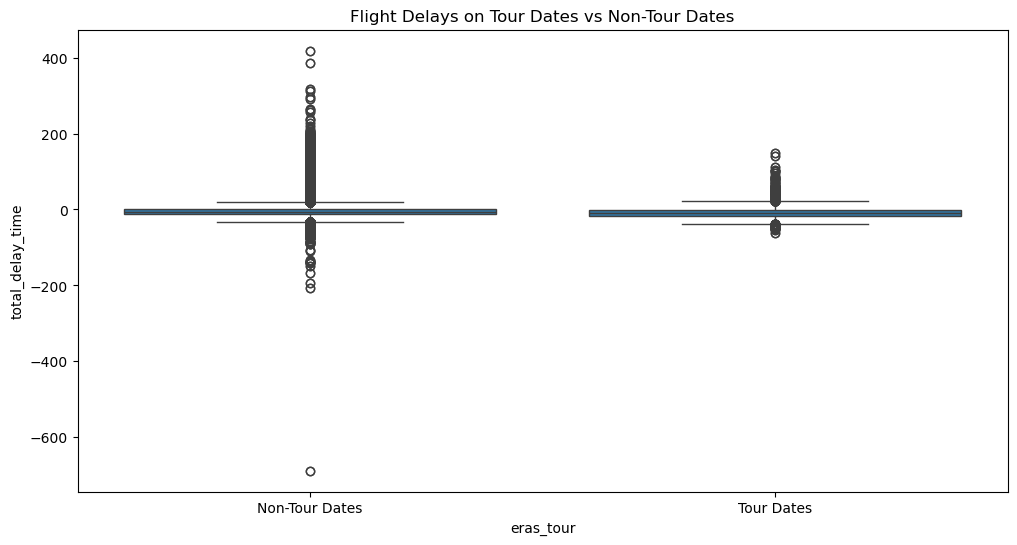

In [200]:
# Visualization of delay distributions
plt.figure(figsize=(12, 6))
sns.boxplot(x='eras_tour', y='total_delay_time', data=combined_data)
plt.xticks([0, 1], ['Non-Tour Dates', 'Tour Dates'])
plt.title('Flight Delays on Tour Dates vs Non-Tour Dates')
plt.show()

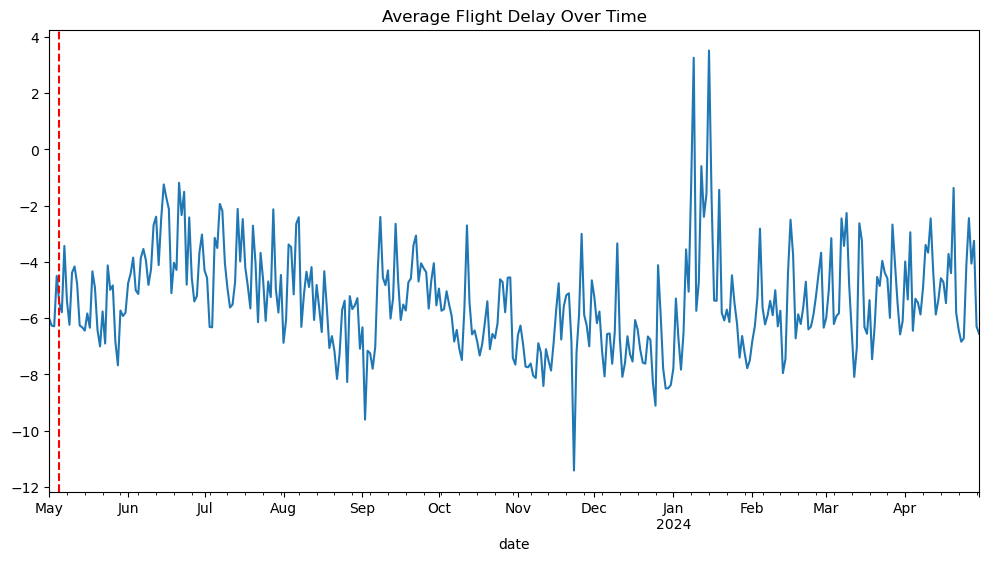

In [202]:
# Time series analysis of average delays
avg_delay_time = combined_data.groupby('date')['total_delay_time'].mean()
avg_delay_time.plot(figsize=(12, 6), title='Average Flight Delay Over Time')
plt.axvline(x='2023-05-05', color='red', linestyle='--')  # Example tour date
plt.show()